<a href="https://colab.research.google.com/github/enakai00/rl_book_solutions/blob/master/Chapter04/Exercise_4_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4.9: Solution

In [0]:
import numpy as np
from pandas import DataFrame

In [0]:
def get_q_val(v, s, a, p):
  q = 0

  # win case
  s_new = s + a
  if s_new == 100:
    r = 1
    q += p*r
  else:
    r = 0
    q += p*(r + v[s_new])

  # loss case
  s_new = s - a
  if s_new == 0:
    r = 0
    q += p*r
  else:
    r = 0
    q += (1-p)*(r + v[s_new])

  return q 


def value_iteration(p=0.5):
  value = np.zeros(101)
  value[100] = 1
  policy = np.ones(101)

  for c in range(500):
    _value = value.copy()
    for s in range(1, 100): # sweep
      qs = []
      for a in range(1, min(s, 100-s)+1):
        q = get_q_val(_value, s, a, p)
        qs.append(q)
      a = np.argmax(qs)
      policy[s] = a + 1
      value[s] = qs[a]

    if max(np.abs(value-_value)) == 0:
      break

  return value, policy

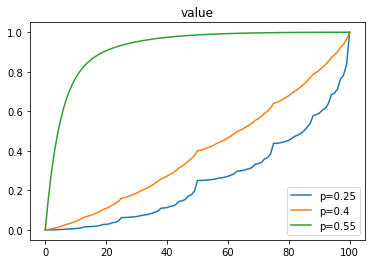

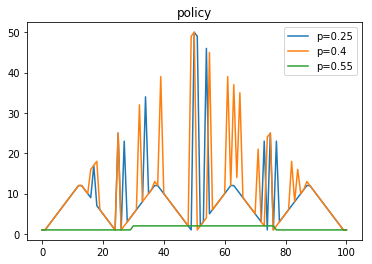

In [0]:
values = {}
policies = {}
for p in [0.25, 0.4, 0.55]:
  value, policy = value_iteration(p)
  values['p={}'.format(str(p))] = value
  policies['p={}'.format(str(p))] = policy

DataFrame(values).plot(title='value')
DataFrame(policies).plot(title='policy')